<a href="https://colab.research.google.com/github/yamaguchinorimitsu/ajax_app/blob/master/%E3%82%B9%E3%83%83%E3%82%AD%E3%83%AA%E6%A9%9F%E6%A2%B0%E7%AC%AC10%E7%AB%A0%E7%B7%B4%E7%BF%92%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

df = pd.read_csv('Bank.csv')
print(df.shape)
df.head()


# まず、ダミー変数化をしたいが、文字列の列が複数あるので抜き出す。
str_col_name=['job','default','marital','education','housing','loan','contact','month']
str_df = df[str_col_name]
#複数列を一気にダミー変数化
str_df2=pd.get_dummies(str_df,drop_first=True)

num_df = df.drop(str_col_name,axis=1)#数値列を抜き出す
df2 = pd.concat([num_df,str_df2,str_df],axis=1)#結合(今後の集計の利便性も考慮してstr_dfも結合しておく)

(11680, 16)


In [2]:
#訓練&検証データとテストデータに分割
train_val,test = train_test_split(df2,test_size=0.1,random_state=9)
train_val.head()

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,default,marital,education,housing,loan,contact,month
658,659,50,83.0,21.0,340.692051,2.0,0.0,0.0,0,0,...,0,0,management,no,divorced,tertiary,yes,no,cellular,aug
11442,11443,60,95.0,27.0,363.736923,1.0,0.0,0.0,0,0,...,0,0,retired,no,divorced,primary,no,yes,sending _document,jun
3095,3096,26,-46.0,20.0,312.022062,7.0,0.0,1.0,1,0,...,0,0,blue-collar,no,single,secondary,yes,no,sending _document,jun
3630,3631,49,298.0,3.0,405.604533,3.0,0.0,1.0,1,0,...,0,0,blue-collar,no,married,secondary,yes,no,cellular,feb
4647,4648,44,100.0,15.0,323.813855,4.0,0.0,0.0,0,0,...,0,0,admin.,no,married,secondary,yes,no,cellular,jul


In [4]:
#欠損値の確認
is_nan=train_val.isnull().sum()
#欠損が存在している列だけ表示
is_nan[is_nan>1]

duration    2740
dtype: int64

In [ ]:
# 改善案1  欠損値の補完方法を線形回帰で行ってみる。
# 多すぎる。

<Axes: >

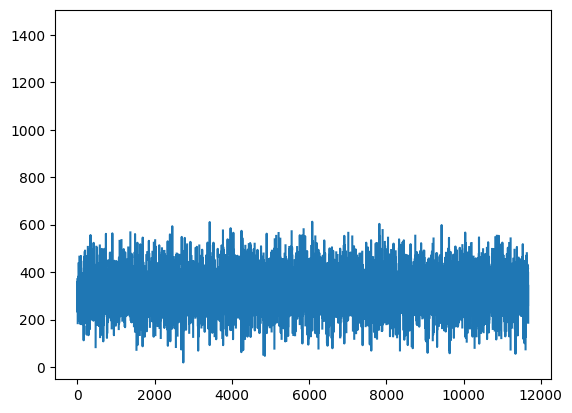

In [5]:
df2['duration'].plot(kind='line')
